In [1]:
%matplotlib inline

import numpy as np

import time
import math
from numpy.linalg import inv
import matplotlib
from scipy.stats import binom
from scipy.stats import gamma
from scipy.stats import laplace
from scipy.optimize import minimize
from scipy import integrate
from scipy.optimize import minimize
from scipy.misc import derivative
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal

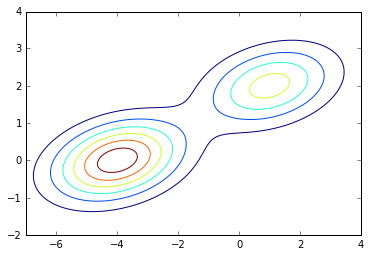

In [8]:
a1 = 0.4
a2 = 0.6
mu1 = [1, 2]
mu2 = [-4, 0]

x, y = np.mgrid[-7:4:.01, -2:4:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv_1 = multivariate_normal(mu1, [[2.0, 0.3], [0.3, 0.5]])
rv_2 = multivariate_normal(mu2, [[2.0, 0.3], [0.3, 0.5]])
p = a1*rv_1.pdf(pos) +  a2*rv_2.pdf(pos)
P = lambda pos1: a1*rv_1.pdf(pos1)+  a2*rv_2.pdf(pos1)
plt.contour(x, y, p)

KL-FORWARD

[-1.98840321  0.80240631]


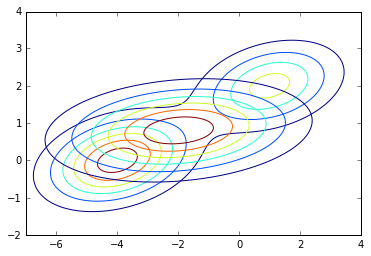

In [12]:
from scipy.integrate import dblquad
cov = [[5.0, 0.3], [0.3, 0.5]]

KL_forward = lambda mu: sum(sum( P(pos) * np.log(P(pos)/multivariate_normal(mu, cov).pdf(pos))))
x_init = [0,0]
KL_min = minimize(KL_forward,x_init,method='L-BFGS-B', bounds=((-7,4),(-2,4)))['x']
print(KL_min)
plt.contour(x, y, p)
plt.contour(x, y, (multivariate_normal(KL_min, cov)).pdf(pos) )
plt.show()

KL-REVERSE

[-3.9014096   0.05308361]


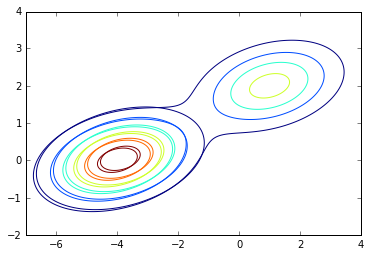

In [10]:
KL_reverse = lambda mu: sum(sum( multivariate_normal(mu, cov).pdf(pos) * np.log(multivariate_normal(mu, cov).pdf(pos)/P(pos))))
x_init = [-3,-1]
KL_min2 = minimize(KL_reverse,x_init,method='L-BFGS-B', bounds=((-7,4),(-2,4)))['x']
print(KL_min2)
plt.contour(x, y, p)
plt.contour(x, y, (multivariate_normal(KL_min2, cov)).pdf(pos) )
plt.show()